# Importing all the libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import  mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score
from sklearn.model_selection import KFold

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

sns.set_style('darkgrid')





In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

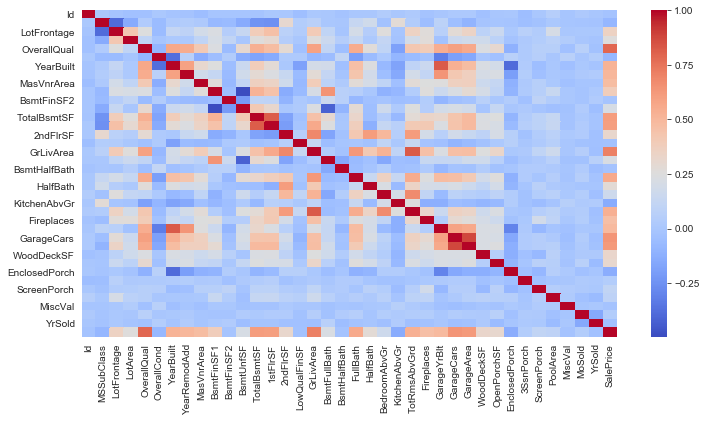

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(),cmap='coolwarm')

In [7]:
print("Train set size:", train.shape)
print("Test set size:", test.shape)

Train set size: (1460, 81)
Test set size: (1459, 80)


In [8]:
train_ID = train['Id']
test_ID = test['Id']

# Drop ID column
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

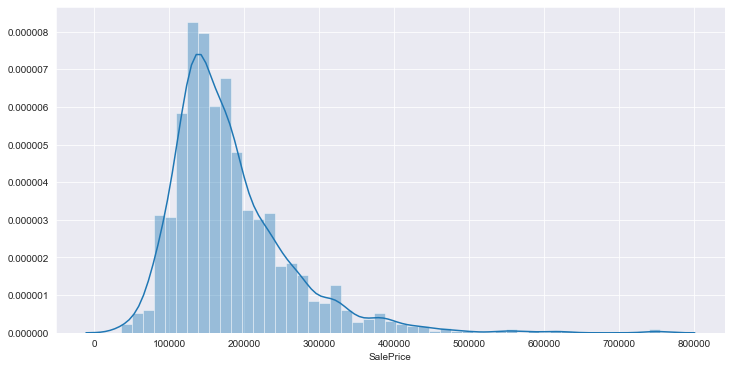

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(train['SalePrice'])

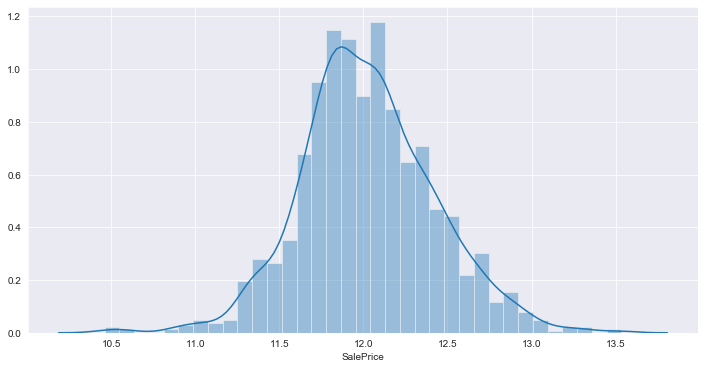

In [10]:
plt.figure(figsize=(12,6))
sns.distplot(np.log1p(train['SalePrice']))

# Cleaning Data

In [11]:
# Use log function to normally distribute the target values
train["SalePrice"] = np.log1p(train["SalePrice"])

# Seperate Target from the train dataset
y = train['SalePrice'].reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test


In [12]:
train_features.select_dtypes('int64')

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
5,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007
7,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009
8,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008
9,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008


In [13]:
# Combine both features of train and test values, to eliminate the need of same feature engineering on both datasets 
features = pd.concat([train_features, test_features]).reset_index(drop=True)


In [14]:
# Convert numeric values stored in non-numeric columns to strings
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

# Filling NA values in several features as the most common values in that paticular feature
features['Functional'] = features['Functional'].fillna(features['Functional'].mode()[0])
features['Electrical'] = features['Electrical'].fillna(features['Electrical'].mode()[0])
features['KitchenQual'] = features['KitchenQual'].fillna(features['KitchenQual'].mode()[0])
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

# Filling NA values for PoolQC, because if it has a NA value it means that there is no pool.
features["PoolQC"] = features["PoolQC"].fillna("None")


In [15]:
# NA values for these columns means that they dont have a single quantity of the feature
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
    
# NA values means that they have no garage, there fill NA with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
    
# Just like the above, NA value represents no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

In [16]:
feature_objects = list(features.select_dtypes('object').columns)
features.update(features[feature_objects].fillna('None'))

In [17]:
# Filling the NA values for 'LotFrontage' based on the street
# LotFrontage is the Linear feet of street connected to property which should be similar for properties that are located in the
# same neighbourhood
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [18]:
# Filling in the rest of features with NaN values, since there is only numeric features left, we will replace all NaN values with 0

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

In [19]:
# find features that are skewed
skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

# using the boxcox algorithm, change the skewed features into normalized distributed data
for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))




C:\Users\chriz\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\chriz\Anaconda3\lib\site-packages\scipy\stats\stats.py:3429: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


### Creating new features

In [20]:
features['TotalSF']=features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

In [21]:
# Creating new features for the availability of the house features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

final_features = pd.get_dummies(features).reset_index(drop=True)


In [22]:
X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]



In [28]:
pd.concat([train_ID,features],axis=1).to_csv("Cleaned_data.csv")

# Decision Trees

In [173]:
dtree = DecisionTreeRegressor()

In [174]:
dtree_params1 = {'min_samples_split': list(range(2,10)),
    'min_samples_leaf':  list(range(1,20)),
    'min_weight_fraction_leaf': np.linspace(0.1,0.5,5),
    'max_features':  list(range(1,len(X.columns),4))+['auto','sqrt','log2'],
    'min_impurity_decrease': np.linspace(0,1,11),
    'min_impurity_split': np.linspace(0,1,11)}

dtree_params2 = {'min_samples_split': list(range(5,20)),
    'min_samples_leaf':  list(range(1,10)),
    'max_features':  list(range(1,len(X.columns),4))+['auto','sqrt','log2'],
    }

In [177]:
dtree_randomgrid = RandomizedSearchCV(estimator=dtree,
                                param_distributions = dtree_params,
                                n_iter=100000,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

dtree_gridsearch = GridSearchCV(estimator=dtree,
                                param_grid = dtree_params2,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

In [178]:
dtree_gridsearch.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37,
                                          41, 45, 49, 53, 57, 61, 65, 69, 73,
                                          77, 81, 85, 89,

In [159]:
dtree_grid.fit(X,y)

C:\Users\chriz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 91960 is smaller than n_iter=100000. Running 91960 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\chriz\Anaconda3\lib\site-packages\sklearn\tree\tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100000, n...
                               

In [160]:
dtree_grid.best_score_

-0.05138691148002852

In [168]:
dtree_grid_bestparams1 = dtree_grid.best_params_

In [169]:
dtree_grid_bestparams1

{'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 9,
 'min_samples_leaf': 6,
 'min_impurity_split': 0.0,
 'min_impurity_decrease': 0.0}

In [179]:
dtree_grid_bestparams2 = dtree_gridsearch.best_params_

In [180]:
dtree_grid_bestparams2

{'max_features': 205, 'min_samples_leaf': 7, 'min_samples_split': 13}

In [282]:
dtree_bestparam_overall = {'max_features': 205, 'min_samples_leaf': 7, 'min_samples_split': 13}

In [182]:
predictions_dtree = np.expm1(dtree_gridsearch.predict(X_sub))


In [183]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [184]:
submission['SalePrice'] = predictions_dtree

In [185]:
submission.to_csv('Submission_dtree2.csv')

###  RMSE Score on Kaggle 0.18446

.

# Random Forest Regression

In [189]:
rfr = RandomForestRegressor()

In [193]:
rfr_param1 = {
    'n_estimators': list(range(1,150)),
    'criterion': ['mse'],
    'min_samples_split': list(range(2,10)),
    'min_samples_leaf':  list(range(1,20)),
    'min_weight_fraction_leaf': np.linspace(0.1,0.5,5),
    'max_features':  list(range(1,len(X.columns),4))+['auto','sqrt','log2']}




In [203]:
rfr_randomggrid = RandomizedSearchCV(estimator=rfr,
                                param_distributions = rfr_param1,
                                n_iter=5000,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

rfr_gridsearch = GridSearchCV(estimator=rfr,
                                param_grid = rfr_param1,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

# dtree_grid = GridSearchCV(estimator=dtree, 
#                    param_grid=dtree_params,
#                    scoring='neg_mean_squared_error', 
#                    cv=5, 
#                    n_jobs=-1)

In [204]:
rfr_randomggrid.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [210]:
rfr_randomggrid.best_score_

-0.034495816385674685

In [211]:
rfr_randomggrid.best_params_

{'n_estimators': 141,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 133,
 'criterion': 'mse'}

In [212]:
rfr_bestparam_overall = {'n_estimators': 141,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 133,
 'criterion': 'mse'}


In [213]:
predictions_rfr = np.expm1(rfr_randomggrid.predict(X_sub))


In [214]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [368]:
submission['SalePrice'] = predictions_rfr

In [369]:
submission.to_csv('Submission_rfr1.csv')

### RMSE Score on Kaggle 0.20662

.

# XGBoost

In [20]:
xgb = XGBRegressor()

In [360]:
xgb_param1 = {
    'n_estimators': list(range(1,5000,10)),
    'learning_rate': np.linspace(0.01,0.5,50),
    'max_depth': list(range(1,10)),
    'min_child_weight': list(range(0,5)),
    'subsamaple': np.linspace(0.1,1,10),
    'colsample_bytree': np.linspace(0.1,1,10),
    'nthread': -1
}

In [361]:
xgb_randomgrid = RandomizedSearchCV(estimator=xgb,
                                param_distributions = xgb_param1,
                                n_iter=10,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

In [362]:
xgb_randomgrid.fit(X,y)

C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=-1,
                                          objective='reg:linear',
                                          random_stat...
                                        'min_child_weight': [0, 1, 2, 3, 4],
                                        'n_estimators': [1, 101, 201, 301, 401,
                                

In [363]:
xgb_randomgrid.best_score_

-0.012422652344987744

In [29]:
xgb_randomgrid.best_params_

{'learning_rate': 0.01,
 'n_estimators': 3460,
 'max_depth': 3,
 'min_child_weight': 0,
 'subsample': 0.7,
 'colsample_bytree': 0.7,
 'nthread': -1}

In [21]:
xgb_bestparam_overall = {'learning_rate': 0.01,
                         'n_estimators': 3460,
                         'max_depth': 3, 
                         'min_child_weight': 0,
                         'subsample': 0.7,
                         'colsample_bytree': 0.7,
                         'nthread': -1}

In [ ]:
predictions_xgb = np.expm1(xgb_randomgrid.predict(X_sub))

In [367]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [370]:
submission['SalePrice'] = predictions_xgb

In [371]:
submission.to_csv('Submission_xgb1.csv')

In [23]:
xgb = XGBRegressor(**xgb_bestparam_overall)

In [24]:
xgb.fit(X,y)

C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[02:42:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [36]:
predictions_xgb2 = np.expm1(xgb.predict(X_sub))


In [37]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [38]:
submission['SalePrice'] = predictions_xgb2

In [39]:
submission.to_csv('Submission_xgb4.csv')

### RMSE score on kaggle 0.12954

In [40]:
q1 = submission['SalePrice'].quantile(0.01)
q2 = submission['SalePrice'].quantile(0.99)

submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*1.1)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*0.9)

In [41]:
submission.to_csv('Submission_xgb3.csv')

In [34]:
abc = pd.Series([1,2,3,4])

In [35]:
abc.quantile(0.1)

1.3

### RMSE score on kaggle 0.13368

# AdaBoost

## AdaBoost - Decision Tree Regressor

In [283]:
dtree_adab = DecisionTreeRegressor(**dtree_bestparam_overall)


In [284]:
ada_dtree = AdaBoostRegressor(base_estimator=dtree_adab)

In [285]:
ada_dtree_paramgrid = {'n_estimators': list(range(1,100,2)),
              'learning_rate': np.linspace(0.01,0.1,10),
              'loss' : ['linear','square','exponential']             
}
# dtree_params2 = {'min_samples_split': list(range(5,20)),
#     'min_samples_leaf':  list(range(1,10)),
#     'max_features':  list(range(1,len(X.columns),4))+['auto','sqrt','log2'],
#     }

In [291]:
ada_dtree_gridsearch = RandomizedSearchCV(estimator=ada_dtree, 
                                    param_distributions=ada_dtree_paramgrid, 
                                    scoring='neg_mean_squared_error',
                                    cv=5,
                                    n_iter=500,
                                    n_jobs=-1)

In [292]:
ada_dtree_gridsearch.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=205,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=7,
                                                                                    min_samples_split=13,
                                                                                    min_weight_fraction_

In [293]:
ada_dtree_gridsearch.best_score_

-0.01681408597474647

In [294]:
ada_dtree_gridsearch.best_params_

{'n_estimators': 77, 'loss': 'square', 'learning_rate': 0.1}

In [296]:
ada_dtree_bestparams_overall = {'n_estimators': 77, 'loss': 'square', 'learning_rate': 0.1}

In [297]:
predictions_adaboost_dtree = np.expm1(ada_dtree_gridsearch.predict(X_sub))


In [298]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [299]:
submission['SalePrice'] = predictions_adaboost_dtree

In [301]:
submission.to_csv('Submission_adaboost_dtree1.csv')

### RMSE Score on Kaggle 0.14216

## AdaBoost - Random Forest Regressor

In [316]:
rfr_adab = RandomForestRegressor(**rfr_bestparam_overall)

In [317]:
ada_rfr = AdaBoostRegressor(base_estimator=rfr_adab)

In [318]:
ada_rfr_paramgrid = {'n_estimators': list(range(1,100,2)),
              'learning_rate': np.linspace(0.01,0.1,10),
              'loss' : ['linear','square','exponential']             
}


In [323]:
ada_rfr_gridsearch = RandomizedSearchCV(estimator=ada_rfr, 
                                    param_distributions=ada_rfr_paramgrid, 
                                    scoring='neg_mean_squared_error',
                                    cv=5,
                                    n_iter=25,
                                    n_jobs=-1)

In [324]:
ada_rfr_gridsearch.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                                                    criterion='mse',
                                                                                    max_depth=None,
                                                                                    max_features=133,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=5,
                                                                                    min_samples_split=5,
     

In [325]:
ada_rfr_gridsearch.best_score_

-0.020558666671377717

In [326]:
ada_rfr_gridsearch.best_params_

{'n_estimators': 97, 'loss': 'square', 'learning_rate': 0.1}

In [474]:
ada_rfr_bestparams_overall = {'n_estimators': 97, 'loss': 'square', 'learning_rate': 0.1}

In [328]:
predictions_adaboost_rfr = np.expm1(ada_rfr_gridsearch.predict(X_sub))


In [329]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [330]:
submission['SalePrice'] = predictions_adaboost_rfr

In [331]:
submission.to_csv('Submission_adaboost_rfr1.csv')

### RMSE Score on Kaggle 0.16037

.

# PCA with XGBoost

## PCA

In [381]:
pca = PCA(n_components=5)

In [382]:
X_scaled = pca.fit(X)

In [383]:
X_scaled = pca.transform(X)

In [399]:
pca_xgb = {
    'n_estimators': list(range(1,5000,10)),
    'learning_rate': np.linspace(0.01,0.5,50),
    'max_depth': list(range(1,10)),
    'min_child_weight': list(range(0,5)),
    'subsamaple': np.linspace(0.1,1,10),
    'colsample_bytree': np.linspace(0.1,1,10)
}

In [400]:
pca_xgb_randomgrid = RandomizedSearchCV(estimator=xgb,
                                param_distributions = xgb_param1,
                                n_iter=5000,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

In [401]:
pca_xgb_randomgrid.fit(X_scaled,y)

[09:48:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=-1,
                                          objective='reg:linear',
                                          random_stat...
                                        'min_child_weight': [0, 1, 2, 3, 4],
                                        'n_estimators': [1, 101, 201, 301, 401,
                                

In [404]:
pca_xgb_randomgrid.best_score_

-0.036601535043301624

In [405]:
pca_xgb_randomgrid.best_params_

{'subsamaple': 0.9,
 'n_estimators': 401,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.02,
 'colsample_bytree': 1.0}

In [406]:
pca_xgb_bestparam_overall = {'subsamaple': 0.9,
 'n_estimators': 401,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.02,
 'colsample_bytree': 1.0}

In [407]:
predictions_pca_xgboost = np.expm1(pca_xgb_randomgrid.predict(pca.transform(X_sub)))


In [408]:
submission = pd.read_csv('sample_submission.csv',index_col=0)

In [409]:
submission['SalePrice'] = predictions_pca_xgboost

In [410]:
submission.to_csv('Submission_pca_xgboost.csv')

### RMSE Score on Kagle 0.20276

# KFold Validation on all tested models 

In [40]:
K = 5
kf = KFold(n_splits = K, shuffle = True)
kfold_list = list(kf.split(X, y))

In [41]:
def calc_train_error(X_train, y_train, model):
    prediction = model.predict(X_train)
    mean_abs_error = mean_absolute_error(y_train,prediction)
    mean_sqr_error = mean_squared_error(y_train,prediction)
    mean_sqr_log_error = mean_squared_log_error(y_train,prediction)
    median_abs_error = median_absolute_error(y_train,prediction)
    r2 = r2_score(y_train,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
        'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_validation_error(X_test, y_test, model):
    prediction = model.predict(X_test)
    mean_abs_error = mean_absolute_error(y_test,prediction)
    mean_sqr_error = mean_squared_error(y_test,prediction)
    mean_sqr_log_error = mean_squared_log_error(y_test,prediction)
    median_abs_error = median_absolute_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
        'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error
    

In [42]:
pca_xgb_bestparam_overall = {'subsamaple': 0.9,
                             'n_estimators': 401,
                             'min_child_weight': 4,
                             'max_depth': 7,
                             'learning_rate': 0.02,
                             'colsample_bytree': 1.0}


ada_rfr_bestparams_overall = {'n_estimators': 97, 
                              'loss': 'square', 
                              'learning_rate': 0.1}


ada_dtree_bestparams_overall = {'n_estimators': 77, 
                                'loss': 'square', 
                                'learning_rate': 0.1}

xgb_bestparam_overall = {'learning_rate': 0.01,
                         'n_estimators': 3460,
                         'max_depth': 3, 
                         'min_child_weight': 0,
                         'subsample': 0.7,
                         'colsample_bytree': 0.7,
                         'nthread': -1}

rfr_bestparam_overall = {'n_estimators': 141,
                         'min_weight_fraction_leaf': 0.1,
                         'min_samples_split': 5,
                         'min_samples_leaf': 5,
                         'max_features': 133,
                         'criterion': 'mse'}

dtree_bestparam_overall = {'max_features': 205, 
                           'min_samples_leaf': 7, 
                           'min_samples_split': 13}

In [43]:
eval_dtree = DecisionTreeRegressor(**dtree_bestparam_overall)

eval_rfr = RandomForestRegressor(**rfr_bestparam_overall)

eval_xgb = XGBRegressor(**xgb_bestparam_overall)

eval_ada_dtree = AdaBoostRegressor(eval_dtree,**ada_dtree_bestparams_overall)

eval_ada_rfr = AdaBoostRegressor(eval_rfr,**ada_rfr_bestparams_overall)

eval_pca_xgboost = XGBRegressor(**pca_xgb_bestparam_overall)

model_list = [eval_dtree,eval_rfr,eval_xgb,eval_ada_dtree,eval_ada_rfr]
model_name = ['Dtree','RFR','XGB','AdaBoost & dtree','AdaBoost & RFR']

In [44]:
metrics = {}

for model,model_name in zip(model_list,model_name):
    train_errors = []
    validation_errors = []
    for train_index, val_index, in kfold_list:

        # split X
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # instantiate model
        model = model

        # calculate errors
        train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, model)

        # append to appropirate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    metrics[model_name] = {'train_errors':train_errors,'validation_errors':validation_errors}

C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:03:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:03:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:04:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:04:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:04:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [104]:
columns = pd.MultiIndex.from_product([['Root Mean Squared Error','Mean Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error','Median Absolute Error','R2 score'], ['Dtree','RFR','XGB','AdaBoost & dtree','AdaBoost & RFR']],
                                     names=['Metric', 'Model'])

metric_df = pd.DataFrame(data=0,columns=columns,index=['{} Iteration'.format(i) for i in range(1,K+1)]+['Average'])
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for k in range(5):
        temp = []
        for j in ['Dtree','RFR','XGB','AdaBoost & dtree','AdaBoost & RFR']:

            temp.append(metrics[j]['validation_errors'][k][i])

        metric_df.loc['{} Iteration'.format(k+1),i] = temp
metric_avg = []
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for j in ['Dtree','RFR','XGB','AdaBoost & dtree','AdaBoost & RFR']:
        metric_avg.append(metric_df[i][j].mean())
metric_df.loc['Average'] = metric_avg

In [105]:
metric_df

Metric      Root Mean Squared Error                                                     Mean Absolute Error                                                     Mean Squared Error                                                     Mean Squared Log Error                                                     Median Absolute Error                                                      R2 score                                                    
Model                         Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR               Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR              Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR                  Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR                 Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR     Dtree       RFR       XGB AdaBoost & dtree AdaBoost & RFR
1 Iteration                0.184659  0.178514  0.116037         0.130598       0.159795            0.131551  0.127904  0.076516         0.089033       0.119906           0.034099  0.031867  0.013465         0.017056       0.025535               0.000202  0.000187  0.000080         0.000100       0.000149              0.095617  0.089272  0.054129         0.062593       0.086854  0.780286  0.794664  0.913241         0.890101       0.835469
2 Iteration                0.218499  0.222627  0.184118         0.184676       0.195208            0.144707  0.143340  0.096124         0.103095       0.122750           0.047742  0.049563  0.033899         0.034105       0.038106               0.000289  0.000310  0.000200         0.000205       0.000231              0.107013  0.085959  0.054742         0.059489       0.081667  0.734719  0.724599  0.811635         0.810490       0.788259
3 Iteration                0.198915  0.205463  0.131128         0.146957       0.173101            0.142231  0.141463  0.082957         0.099474       0.124447           0.039567  0.042215  0.017194         0.021596       0.029964               0.000241  0.000253  0.000102         0.000132       0.000179              0.103824  0.094219  0.052497         0.064722       0.091929  0.756069  0.739745  0.893996         0.866860       0.815272
4 Iteration                0.176119  0.178794  0.101441         0.132864       0.161078            0.130992  0.133141  0.075432         0.097617       0.126634           0.031018  0.031967  0.010290         0.017653       0.025946               0.000185  0.000189  0.000061         0.000105       0.000154              0.099200  0.098699  0.058364         0.071796       0.094696  0.774579  0.767680  0.925216         0.871709       0.811438
5 Iteration                0.186038  0.181453  0.107147         0.131032       0.157971            0.138169  0.119675  0.076191         0.093041       0.115579           0.034610  0.032925  0.011480         0.017169       0.024955               0.000204  0.000191  0.000068         0.000102       0.000145              0.103605  0.072981  0.054884         0.066668       0.085312  0.784777  0.795254  0.928609         0.893232       0.844818
Average                    0.160705  0.161142  0.106645         0.121021       0.141192            0.114608  0.110921  0.067870         0.080377       0.101553           0.031173  0.031423  0.014388         0.017930       0.024084               0.000187  0.000188  0.000085         0.000107       0.000143              0.084876  0.073522  0.045769         0.054211       0.073410  0.638405  0.636990  0.745450         0.722065       0.682543

In [125]:
metric_df_transpose = metric_df.transpose()

In [126]:
metric_df_transpose

1 Iteration  2 Iteration  3 Iteration  4 Iteration  5 Iteration   Average
Metric                  Model                                                                                      
Root Mean Squared Error Dtree                0.184659     0.218499     0.198915     0.176119     0.186038  0.160705
                        RFR                  0.178514     0.222627     0.205463     0.178794     0.181453  0.161142
                        XGB                  0.116037     0.184118     0.131128     0.101441     0.107147  0.106645
                        AdaBoost & dtree     0.130598     0.184676     0.146957     0.132864     0.131032  0.121021
                        AdaBoost & RFR       0.159795     0.195208     0.173101     0.161078     0.157971  0.141192
Mean Absolute Error     Dtree                0.131551     0.144707     0.142231     0.130992     0.138169  0.114608
                        RFR                  0.127904     0.143340     0.141463     0.133141     0.119675  0.110921
                        XGB                  0.076516     0.096124     0.082957     0.075432     0.076191  0.067870
                        AdaBoost & dtree     0.089033     0.103095     0.099474     0.097617     0.093041  0.080377
                        AdaBoost & RFR       0.119906     0.122750     0.124447     0.126634     0.115579  0.101553
Mean Squared Error      Dtree                0.034099     0.047742     0.039567     0.031018     0.034610  0.031173
                        RFR                  0.031867     0.049563     0.042215     0.031967     0.032925  0.031423
                        XGB                  0.013465     0.033899     0.017194     0.010290     0.011480  0.014388
                        AdaBoost & dtree     0.017056     0.034105     0.021596     0.017653     0.017169  0.017930
                        AdaBoost & RFR       0.025535     0.038106     0.029964     0.025946     0.024955  0.024084
Mean Squared Log Error  Dtree                0.000202     0.000289     0.000241     0.000185     0.000204  0.000187
                        RFR                  0.000187     0.000310     0.000253     0.000189     0.000191  0.000188
                        XGB                  0.000080     0.000200     0.000102     0.000061     0.000068  0.000085
                        AdaBoost & dtree     0.000100     0.000205     0.000132     0.000105     0.000102  0.000107
                        AdaBoost & RFR       0.000149     0.000231     0.000179     0.000154     0.000145  0.000143
Median Absolute Error   Dtree                0.095617     0.107013     0.103824     0.099200     0.103605  0.084876
                        RFR                  0.089272     0.085959     0.094219     0.098699     0.072981  0.073522
                        XGB                  0.054129     0.054742     0.052497     0.058364     0.054884  0.045769
                        AdaBoost & dtree     0.062593     0.059489     0.064722     0.071796     0.066668  0.054211
                        AdaBoost & RFR       0.086854     0.081667     0.091929     0.094696     0.085312  0.073410
R2 score                Dtree                0.780286     0.734719     0.756069     0.774579     0.784777  0.638405
                        RFR                  0.794664     0.724599     0.739745     0.767680     0.795254  0.636990
                        XGB                  0.913241     0.811635     0.893996     0.925216     0.928609  0.745450
                        AdaBoost & dtree     0.890101     0.810490     0.866860     0.871709     0.893232  0.722065
                        AdaBoost & RFR       0.835469     0.788259     0.815272     0.811438     0.844818  0.682543

In [117]:
columns

MultiIndex(levels=[['Mean Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error', 'Median Absolute Error', 'R2 score', 'Root Mean Squared Error'], ['AdaBoost & RFR', 'AdaBoost & dtree', 'Dtree', 'RFR', 'XGB']],
           codes=[[5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4], [2, 3, 4, 1, 0, 2, 3, 4, 1, 0, 2, 3, 4, 1, 0, 2, 3, 4, 1, 0, 2, 3, 4, 1, 0, 2, 3, 4, 1, 0]],
           names=['Metric', 'Model'])

In [121]:
list(columns.get_level_values(0).unique())

['Root Mean Squared Error',
 'Mean Absolute Error',
 'Mean Squared Error',
 'Mean Squared Log Error',
 'Median Absolute Error',
 'R2 score']

In [141]:
metric_df_transpose.loc['Root Mean Squared Error'].reset_index()['Average'].max()

0.1611419403183457

(0, 0.2)

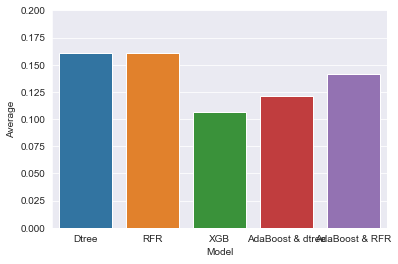

In [137]:
sns.barplot(data=metric_df_transpose.loc['Root Mean Squared Error'].reset_index(),x='Model',y='Average')
plt.ylim((0,0.2))
plt.add

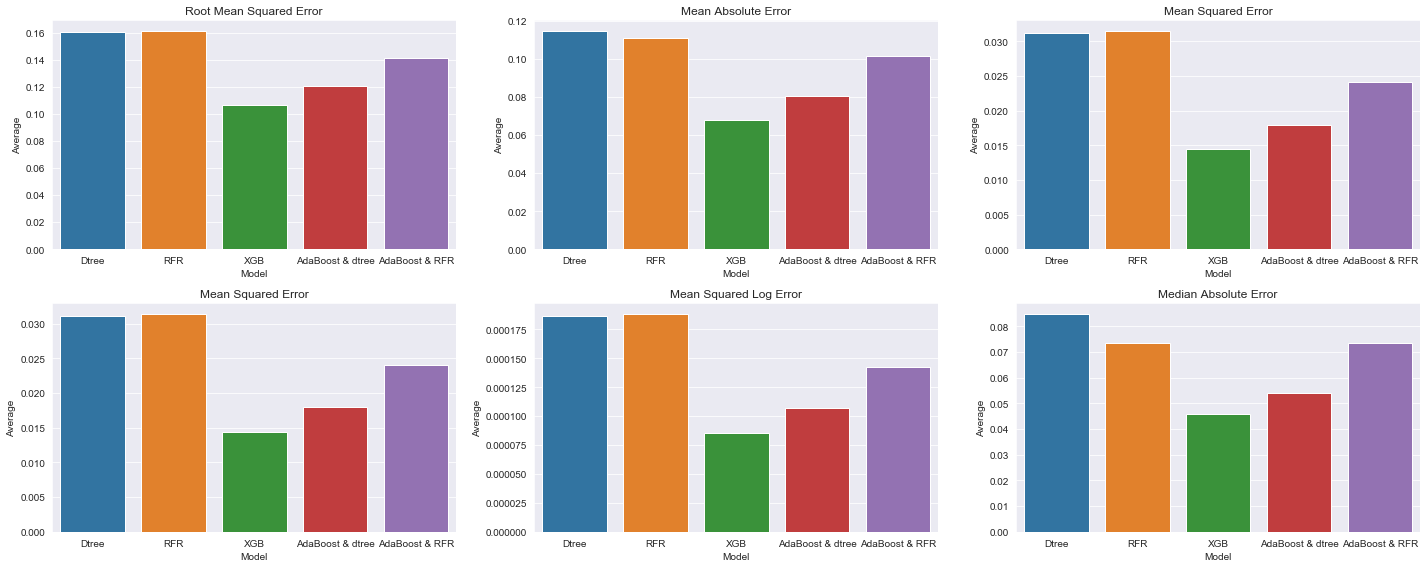

In [175]:
eval_metric_parameters = list(columns.get_level_values(0).unique())
eval_model_names = list(columns.get_level_values(1).unique())
f, axes = plt.subplots(2, 3,figsize=(20,8))
for i in range(2):
    for j in range(3):
        current_metric_parameter = eval_metric_parameters[i*2+j]
        current_data = metric_df_transpose.loc[current_metric_parameter].reset_index()
        sns.barplot(data=current_data,x='Model',y='Average',ax=axes[i][j])
        axes[i][j].set_title(current_metric_parameter)
plt.tight_layout()

## From this we can see that XGBoost is the clear choice for this paticular dataset, with it having the lowest errors in all metric parameters

In [30]:
import pickle

In [31]:
xgb = XGBRegressor(learning_rate=0.01,
                    n_estimators= 3460,
                    max_depth= 3, 
                    min_child_weight= 0,
                    subsample= 0.7,
                    colsample_bytree= 0.7,
                    nthread= -1)

In [32]:
xgb.fit(X,y)

C:\Users\chriz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[01:15:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.7, verbosity=1)

In [179]:
pickle.dump(xgb,open('Housing_prices_xgb.sav','wb'))


## Feature Evaluation

In [33]:
coef1 = pd.Series(xgb.feature_importances_,X.columns).sort_values(ascending=False)


In [39]:
coef1 = coef1.sort_values(ascending=False)[:10]

In [46]:
pd.DataFrame(coef1).transpose()

,ExterQual_TA,hasfireplace,GarageCars,FireplaceQu_None,ExterQual_Fa,OverallQual,Fireplaces,GrLivArea,Total_Bathrooms,BsmtQual_Ex
0,0.061614,0.057576,0.053588,0.041996,0.039644,0.032442,0.029614,0.024473,0.023948,0.023381


Text(0.5, 1.0, 'Feature Importance')

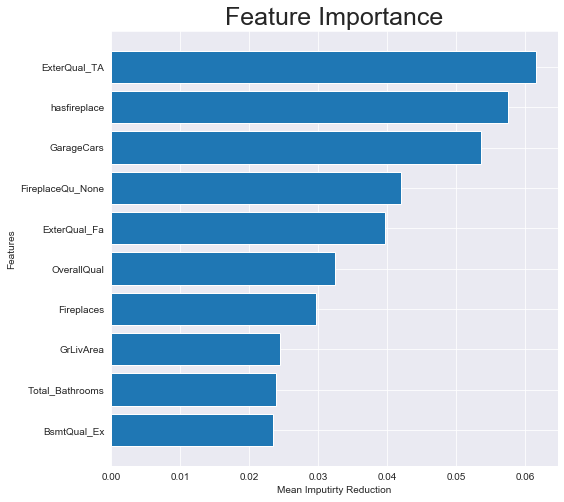

In [44]:
plt.figure(figsize=(8,8))
plt.barh(coef1.sort_values().index,coef1.sort_values().values)
plt.xlabel("Mean Imputirty Reduction")
plt.ylabel('Features')
plt.title('Feature Importance',fontsize=25)